# FLDAS Explorer Dashboard
Modified: Jun 13, 2019

In [517]:
%load_ext autoreload
%autoreload 2

import os, sys, time
import datetime as dt
import numpy as np, scipy as sp, pandas as pd, geopandas as gpd
import intake,param
    
from pathlib import Path
from pprint import pprint as pp
p = print 

import joblib
import pdb

from tqdm import tqdm, trange
import ipywidgets as iw

import matplotlib.pyplot as plt
%matplotlib inline

# ignore warnings
import warnings
if not sys.warnoptions:
    warnings.simplefilter('ignore')
    
# Don't generate bytecode
sys.dont_write_bytecode = True
import holoviews as hv
import xarray as xr
import xarray.ufuncs as xu

from holoviews import opts, dim
from holoviews.operation.datashader import datashade, shade, dynspread, rasterize
from holoviews.streams import Stream, param, Tap, Selection1D, PointerXY, RangeXY
from holoviews import streams
import geoviews as gv
import geoviews.feature as gf
from geoviews import tile_sources as gvts

import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cf

hv.notebook_extension('bokeh')
hv.Dimension.type_formatters[np.datetime64] = '%Y-%m-%d'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
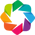

In [519]:
import holoviews as hv
import xarray as xr
import xarray.ufuncs as xu

from holoviews import opts, dim
from holoviews.operation.datashader import datashade, shade, dynspread, rasterize
from holoviews.streams import Stream, param, Tap, Selection1D, PointerXY, RangeXY
from holoviews import streams
import geoviews as gv
import geoviews.feature as gf
from geoviews import tile_sources as gvts

import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cf

hv.notebook_extension('bokeh')
hv.Dimension.type_formatters[np.datetime64] = '%Y-%m-%d'

In [520]:
SP_ROOT = Path('/home/hayley/Playground/Spacenet_Preprocess/')
SP_UTILS = SP_ROOT/'scripts'

# # Add the utils directorys to the search path
CURR_UTILS = Path('../utils').absolute()

DIRS2ADD = [CURR_UTILS, SP_UTILS]
for UTILS_DIR in DIRS2ADD:
    assert UTILS_DIR.exists()
    if str(UTILS_DIR) not in sys.path:
        sys.path.insert(0, str(UTILS_DIR))
        print(f"Added {str(UTILS_DIR)} to sys.path")

In [ ]:
# Grab registered bokeh renderer
print("Currently available renderers: ", *hv.Store.renderers.keys())
renderer = hv.renderer('bokeh')

In [ ]:
Path.ls = lambda x: [o.name for o in x.iterdir()]

In [ ]:
from shapely.geometry import Polygon, Point
from geo_helpers import bounds2poly, crop_gdf_to_bounds, get_polys_at_lonlat
from output_helpers import nprint, nhprint, print_mro as pmro
from river_helpers import load_river_csvs


## Set default holoviews style options

In [ ]:
%opts Image [colorbar=True, tools=['hover'], active_tools=['wheel_zoom']] Curve [tools=['hover']]

In [514]:
H,W = 1000,1000
CURVE_H, CURVE_W = 300, 1000
opts.defaults(
    
    opts.Image(active_tools=['wheel_zoom'], tools=['hover'], colorbar=True),
    opts.Curve(active_tools=['wheel_zoom'], tools=['hover'], padding=0.1,
              height=CURVE_H, width=CURVE_W),
    opts.Scatter(active_tools=['wheel_zoom'], tools=['hover']),
    opts.HLine(active_tools=['wheel_zoom'], tools=['hover']),

    opts.RGB(active_tools=['wheel_zoom'], tools=['hover']),
    opts.Overlay(active_tools=['wheel_zoom']),
    
    opts.Points(active_tools=['wheel_zoom'], tools=['hover','tap']),
    opts.Path(active_tools=['wheel_zoom'], tools=['hover']),

    opts.Polygons(active_tools=['wheel_zoom'], tools=['hover','tap']),
    opts.WMTS(height=H, width=W),

)



## Basemap tile
We need to handle the projection from latlon to web mercator (which is what the hv.tiles expect).

In [ ]:
# basemap = gvts.EsriImagery
# basemap
wmts_url = 'https://maps.wikimedia.org/osm-intl/{Z}/{X}/{Y}@2x.png'

# basemap = gv.tile_sources.EsriImagery
# basemap = gv.tile_sources.EsriUSATopo
# basemap = gv.tile_sources.StamenTerrain
topomap = gv.tile_sources.EsriNatGeo
labelmap = gv.tile_sources.StamenLabels 
basemap = topomap #* labelmap

# river = gv.feature.rivers
# boarders = gv.Feature(cf.BORDERS)
# base = basemap * boarders

---
## Load Datasets

 1. River measurements

In [ ]:
data_root = Path.home()/'data/mint'
data_dir = data_root/'river'
data = load_river_csvs(data_dir)
data['geometry'] = gpd.points_from_xy(data.Longitude, data.Latitude)


In [ ]:
# nprint(len(data), data.head(), data.sample(10))
c = 0
for coord, g in data.groupby( ['Latitude', 'Longitude'] ):
    if c >= 5:
        break
    print(coord, len(g))
    c += 1

In [ ]:
gvd = gv.Dataset(data, kdims=['Latitude', 'Longitude', 'Time'], vdims=['River_Width', 'River_Depth'])
dmap = gvd.to(gv.Points, kdims=['Longitude', 'Latitude'], vdims=['River_Width', 'River_Depth'], 
             dynamic=True)

In [ ]:
dmap.opts(color='River_Width', size='River_Width', cmap='viridis')

- Get unique points: With Avg. Width

In [ ]:
points = []
lats, lons = [], []
avg_ws = []
for (lat,lon), g in data.groupby(['Latitude', 'Longitude']):
    points.append(Point(lon, lat))
    lats.append(lat)
    lons.append(lon)
    avg_ws.append(g.River_Width.mean().item())

In [ ]:
df_avg = pd.DataFrame({'geometry': points,
                           'Longitude': lons,
                           'Latitude': lats,
                           'River_Width_Avg': avg_ws})
df_avg.head()
                           

In [ ]:
gv_avg = gv.Points(df_avg, 
                   ['Longitude', 'Latitude'], 
                   'River_Width_Avg').opts(
    color=dim('River_Width_Avg').norm(), 
    size=dim('River_Width_Avg').norm()*40)

In [ ]:
def get_gv_avg(scale):
    gv_avg = gv.Points(df_avg, 
                       ['Longitude', 'Latitude'], 
                       'River_Width_Avg')
    return gv_avg.opts(color=dim('River_Width_Avg').norm(), 
                       size=dim('River_Width_Avg').norm()*scale)

# parameterized class as a strem
class Scale(param.Parameterized):
    scale = param.Number(default=15, bounds=(10,30))
    
# Add flexibility to set the size of points
scale = Scale()
scale_stream = streams.Params(scale)
dmap_gv_avg = hv.DynamicMap(get_gv_avg, 
                            streams=[scale_stream])
dmap_gv_avg
    

2. Basins data

In [ ]:
basin_dir = data_root/'hybas_world_lev05_v1c'; assert basin_dir.exists()

gdf_basins = crop_gdf_to_bounds( gpd.read_file(basin_dir)[['HYBAS_ID', 'geometry']],
                                bounds,
                                remove_empty=True).reset_index().drop('index', axis=1)
gdf_basins['HYBAS_ID']=gdf_basins.HYBAS_ID.astype(str)
print(len(gdf_basins))
gdf_basins.head()

In [ ]:
gv_basins = gv.Polygons(gdf_basins, vdims=['HYBAS_ID'])

In [ ]:
%%opts WMTS [height=H, width=W] Polygons(alpha=0.5)
basemap * gv_basins * dmap * dmap_gv_avg

3. Assign basin_id to points in river measurement data

In [ ]:
## GeoPandas from river pandas dataframe
bids = []
c = 0
for lon, lat in zip(data.Longitude, data.Latitude):
    bid = get_basin_id(gdf_basins, lon,lat)
    bids.append(bid)
    if c%30==0: print(lon, lat, bid)
    c += 1
    

In [ ]:
data['HYBAS_ID'] = bids

In [ ]:
# Geopadnas river measurement data
gdf_data = gpd.GeoDataFrame(data)
gdf_data.crs = {'init': 'epsg:4326'}
gdf_data.head()

---
## Add LatLon Tab selector stream
- Fetch the lat/lon of the mouse click position on the basemap

    1. Define callbacks

In [ ]:
def select_data_at_lonlat(data, lon, lat):
    """
    data: dataFrame or GeoDataFrame
    lat: float
    lon: float
    """
    return data[np.isclose(data.Longitude, lon) & np.isclose(data.Latitude, lat)]

def tseries_from_lonlat(data, lon, lat):
    df = select_data_at_latlon(data, lon, lat)
    curve_w = hv.Curve(df, 'Time', 'River_Width', label='width')
    curve_d = hv.Curve(df, 'Time', 'River_Depth', label='depth')
    return curve_w * curve_d 

def tseries_from_index(data, 
                       index_src, 
                       index):
    if len(index) < 1:
        return hv.Curve([])
    elif len(index) > 1:
        print('Warning: multiple points were selected. Only care for the first point')
        index = index[:1]
              
    lon,lat = index_src.iloc[index].Longitude.item(),index_src.iloc[index].Latitude.item()
    print(lon, type(lon),lat, type(lat))
    df = select_data_at_lonlat(data, lon, lat)
    curve_w = hv.Curve(df, 'Time', 'River_Width', label='width')
    curve_d = hv.Curve(df, 'Time', 'River_Depth', label='depth')
    return curve_w * curve_d 

    2. Register streams

In [ ]:
# stream_xy = PointerXY(name='lonlat', 
#                     x=34., y=9., source=gv_basins)

In [495]:
stream_tab = Selection1D(name='tab', source=gv_avg, index=[0])
dmap_tab = hv.DynamicMap(lambda index: hv.Div(f'point index:  {index}'),
                        streams=[stream_tab])
dmap_tseries = hv.DynamicMap(lambda index: tseries_from_index(data, df_avg, index),
                             streams=[stream_tab])

In [513]:
stream_btab = Selection1D(name='btap', source=gv_basins, index=[0])
debug_btab = hv.DynamicMap(lambda index: hv.Div(f'basin index:  {index}'),
                        streams=[stream_btab])
gv_basins + debug_btab

:Layout
   .Polygons.I   :Polygons   [Longitude,Latitude]   (HYBAS_ID)
   .DynamicMap.I :DynamicMap   []
      :Div

In [496]:
min_val = np.min(data[['River_Width', 'River_Depth']].min().to_list())
max_val = np.max(data[['River_Width', 'River_Depth']].max().to_list())

In [524]:
#overlay
#cmap for points:  plt.cm.gist_earth, plasma, inferno, fire, visidis
scale.sacle=40

(
    basemap 
    * gv_avg.opts(cmap='plasma') #* dmap_gv_avg 
#     * gv_basins.opts(alpha=0.1)
    + dmap_tseries.opts(
     opts.Curve(framewise=True, 
                show_grid=True, 
                ylim=(min_val,max_val)
               )
 )
).cols(1)



:Layout
   .Overlay.I    :Overlay
      .WMTS.I   :WMTS   [Longitude,Latitude]
      .Points.I :Points   [Longitude,Latitude]   (River_Width_Avg)
   .DynamicMap.I :DynamicMap   []
      :Overlay
         .Curve.Width :Curve   [Time]   (River_Width)
         .Curve.Depth :Curve   [Time]   (River_Depth)

---
OLD?

In [ ]:
from river_helpers import select_gdf_at_lonlat, get_basin_id

def cb_select_basin(gdf, lon, lat, vdim_col='HYBAS_ID'):
    gdf_selected = select_gdf_at_lonlat(gdf,lon,lat)
    if len(gdf_selected) > 0:
        return gv.Polygons(gdf_selected, 
                           vdims=vdim_col if vdim_col in gdf_selected.columns else None,
                           group='Basin')
    else:
        return gv.Polygons([])
    

In [ ]:
                        
dmap_basin = hv.DynamicMap(lambda x,y: get_basins(gdf_basins, x, y), 
                           streams=[stream_xy]).opts(color='red', alpha=0.5)

dmap_basin_id=hv.DynamicMap(lambda x,y:hv.Div(f'Lng:{ x:.3f}, Lat: {y:.3f}, basin: {get_basin_id(gdf_basins,x,y)}'), 
                           streams=[stream_xy])

dmap_basin #+ dmap_basin_id
# )
# + 
# pt_showbox

In [ ]:
(
    gv_basins * dmap_basin + dmap_basin_id 
).opts(
    opts.Polygons(alpha=0.5, color='red')
    
)#+ pt_showbox #hv.DynamicMap(lambda x,y: get_basins(gdf_basins, x, y), streams=[stream_xy]) 

In [ ]:
get_tseries(gdf_basins, gdf_data,  '1050040270')

In [ ]:
gv.Points(gdf_data.sample(10))

In [ ]:
def select_data_at_time(data, t):
    """
    data: dataFrame like object
    tlist: Iterable of dt.datetime object or pd.Timestamp object
        - eg: t = [dt.datetime(2016,1,9)]
    """
#     return data[data.Time == t]
    df = data[data.Time == t]
    points = gv.Points(df, 
                     kdims=['Longitude', 'Latitude'], 
                     vdims=['River_Width', 'River_Depth'])
    return points.opts(color='River_Width', size=dim('River_Depth')*3)

def select_data_at_times(data, tlist):
    """
    data: dataFrame like object
    tlist: Iterable of dt.datetime object or pd.Timestamp object
        - eg: t = [dt.datetime(2016,1,9)]
    """
    return data[data.Time.isin(tlist)]


def test_select_data_at_times():
    times = data.Time.to_list()
    displat(select_data_at_times(data, times[:2]).head())
    

In [ ]:
dmap = hv.DynamicMap(lambda t: select_data_at_time(data, t), 
                     kdims='t').redim.values(t=times)


In [ ]:
(base * gv_basins * dmap).opts(
    opts.Points(color='viridis')

In [ ]:
tmin, tmax = data.Time.min(), data.Time.max()

class RiverViz(param.Parameterized):
    time = param.Date(tmin, bounds=(tmin, tmax))
    basin = param.ObjectSelector(default=

- [] use width as size
- time series: river width and depth in y-axis

---

- basin vector: use clicks on it and show basin id
    -> put into basin 
    -> filter by bounds
- show all data (interpolated)
    -> use select by date range
    



In [ ]:
ts = times[:2]
data[data.Time.isin(ts)].head()

In [ ]:
t1 = dt.datetime(2016,1,9)

In [ ]:
t1 == _157

In [ ]:
data[data.Time == t1]

## Ethiopia spatial data
https://www.diva-gis.org/gdata


In [ ]:
# ethiopia bbox
bounds = 32.95418, 3.42206, 47.78942, 14.95943 #minx, miny, maxx, maxy

In [ ]:
road_dir = data_root/'ETH_rds'
wat_dir = data_root/'ETH_wat'
hflow_dir = data_root/'h1k_flow'
basin_dir = data_root/'hybas_world_lev05_v1c'

road_dir.exists(), wat_dir.exists(), hflow_dir.exists(), basin_dir.exists()

In [ ]:
gdf_rds = crop_gdf_to_bounds(gpd.read_file(road_dir)[['geometry']],
                             bounds,
                             remove_empty=True).reset_index().drop('index', axis=1)

gdf_wats = crop_gdf_to_bounds(gpd.read_file(wat_dir)[['NAME', 'geometry']],
                              bounds,
                              remove_empty=True).reset_index().drop('index', axis=1)

gdf_hflow = crop_gdf_to_bounds(gpd.read_file(hflow_dir),
                               bounds, 
                               remove_empty=True).reset_index().drop('index', axis=1)

gv_rds = gv.Path(gdf_rds, label='roads') 
gv_wats = gv.Polygons(gdf_wats, label='water')
gv_hflow = gv.Path(gdf_hflow, label='hflow')

In [ ]:
print(gdf_rds.geom_type.unique(), gdf_wats.geom_type.unique(), gdf_hflow.geom_type.unique())

In [ ]:
len(gdf_rds), len(gdf_wats), len(gdf_hflow)

In [ ]:
# Southern Africa Dataset
fpath_sa = '/home/hayley/data/mint/FLDAS/FLDAS_NOAH01_A_SA_D.001/2019/04/FLDAS_NOAH01_A_SA_D.A201904*.001.nc'
fpath_ea = '/home/hayley/data/mint/FLDAS/FLDAS_NOAH01_A_EA_D.001/2019/04/FLDAS_NOAH01_A_EA_D.A201904*.001.nc'
ds_sa = xr.open_mfdataset(fpath_sa)
ds_sa = ds_sa.drop_dims('bnds')

ds_ea = xr.open_mfdataset(fpath_ea)
ds_ea = ds_ea.drop_dims('bnds')

         
# print(ds_ea)
# print(ds_sa)

In [ ]:
xrd_ea = ds_ea.persist()
xrd_sa = ds_sa.persist()

In [ ]:
# data variable list
varnames_ea = list(ds_ea.data_vars.keys())
varnames_sa = list(ds_sa.data_vars.keys())
varnames = varnames_ea
varname = varnames[3]
print(varname)

#set height, width for images (for plotting)
H_IMG, W_IMG = 400, 400

# create holoviews dataset containers 
kdims = ['X','Y','time']
hvd_ea = hv.Dataset(xrd_ea, kdims)
hvd_sa = hv.Dataset(xrd_sa, kdims)


In [ ]:
# colormaps
## discretize it conveniently using holoview's "color_level" option
t_fixed = '2019-04-05'
varname = varnames[5] 
print("Selecting a datavariable at a fixed time point: ", t_fixed, varname)

# timg_ea = hvd_ea.select(time=t_fixed).to(gv.Image, kdims=['X', 'Y'], vdims=varname) #this returns a holomap, not a hv.Image object
# To construct an hv.Image object, we need to pass in the xr.DataArray (ie. one value variable)
print(xrd_ea[varname].isel(time=3) )
timg_ea = gv.Image(xrd_ea[varname].isel(time=3) , ['X','Y'], crs=ccrs.PlateCarree()) #Opt: vdims=varname
timg_sa = gv.Image(xrd_sa[varname].isel(time=3) , ['X','Y'], crs=ccrs.PlateCarree()) #Opt: vdims=varname
# print(timg_sa)
# gv.tile_sources.Wikipedia * timg_ea.opts(alpha=0.5,width=W_IMG, height=H_IMG) #+ timg_sa.opts(width=W_IMG, height=H_IMG)

---
## Add LatLon Tab selector stream
 Modified: Jun 16, 2019

- Fetch the lat,lon location from the mouse location

In [ ]:
from holoviews.streams import Tap, Selection1D, PointerXY, RangeXY

In [ ]:
# point_src = timg_ea
# pointxy = PointerXY(name='pt_latlon', 
#                     x=0., y=0.,source=point_src)
# pointxy.print_param_values()
# selection = Selection1D(source=timg_ea)


Modified: Jun 17, 2019

In [ ]:
# tseries_opts = {
    
def cb_tseries(xrd, varname, x, y, method='nearest'):
    tseries = xrd[varname].sel(X=x, Y=y,method=method)
    tseries_label = f"Time Series at Lon,Lat = ({x:.2f},{y:.2f}) "
    scatter = hv.Scatter(tseries)
    curve = hv.Curve(tseries)

    mean = hvu.extract_item(tseries.mean())
    mean_line = hv.HLine(mean, label='tseries_mean')
    t_midpoint = pd.Timestamp(hvu.extract_item(tseries.coords['time'][len(tseries)//2]))
    mean_label = hv.Labels([(t_midpoint, mean, f'mean: {mean:.3f}')])
    layout = (
        curve.opts(alpha=0.5, line_width=1) 
        * scatter.opts(width=W, padding=0.2, size=5) 
        * mean_line.opts(color='black', alpha=0.5, line_width=1) 
        * mean_label.opts(text_font_size='8pt',text_alpha=0.5)
    )
    layout.label=tseries_label
    return layout
    
    
    

---
## Add another callback. 
Modified: Jun 17, 2019

- On LatLon selection, compute the statistics of the current `varname` at `latlon_selected` across time.


In [ ]:
def cb_tstats(xrd, varname, x, y, 
              method='nearest',
             show_as_timestamp=True,
             decimals=3):
    tseries = xrd[varname].sel(X=x, Y=y,method=method)
    df = hvu.get_stats(tseries, 
                       show_as_timestamp=show_as_timestamp,
                       decimals=decimals)
    
    # Add metadata on selected latlon point
#     df['point_idx'] = index[0]#
    df['lat'] = y
    df['lon'] = x
    
    cols = df.columns.to_list()
    cols = cols[-2:] + cols[:-2]
    df = df[cols]
    label = f"Time Series Stats at Lon,Lat = ({x:.2f},{y:.2f}) "
    return hv.Table(df, label=label)
################################################################################
    # Cleanup for table's aesthetics
    # Coerce object type to datetime objs
#     df = df.T
#     if show_as_timestamp:
#         df.loc['argmin'] = pd.Timestamp(df.loc['argmin'])
#         pdb.set_trace()
#         display(df.loc['argmin'])

#         df.loc['argmax'] = pd.to_datetime(df.loc['argmax'])
#     df = df.reset_index()

#     return hv.Table(df.values, 'stat', 'value')
################################################################################


In [ ]:
cb_tstats(xrd_ea, varname, 40,10)

In [ ]:
curve_opts = {'framewise':True}
varname = varnames[1]
# timg_ea +\
# hv.DynamicMap(lambda x,y: get_tseries(xrd_ea, varname, x, y,curve_opts=curve_opts),
#               streams=[pointxy])

---
## Combine the two callbacks for LatLon Tab selector
Modified: Jun 17, 2019

In [ ]:
def cb_latlon_tab(xrd, varname, x, y, **kwargs):
    """
    Creates a hv.Overlay object with two elements
    - layout = tseries + table
    where 
        - tseries: itself an overlay with scatter, curve, hline and a text for 
        the time series data at the selected LonLat location
        - table: contains basic statistics of the time series data at the selected location
    Args:
    - xrd (xarray.Dataset)
    - varname (str)
    - x (int): index to xrd's 'X' dim
    - y (int): index to xrd's 'Y' dim
    
    kwargs:
    - method (str): xarray's .sel method. Default: 'nearest'
    - show_as_teimstamp (bool): if True, the table will show time data as time rather than an index
    - decimals (int): number of decimals to kwarg to np.around() for float point display
    
    Returns
    - layout (hv.Overlay)
    """
    # Get the kwarg values
    method = kwargs.get('method', 'nearest')
    show_as_timestamp = kwargs.get('show_as_timestamp', True)
    decimals = kwargs.get('decimals', 3)
    
    # Get hv elements
    tseries = cb_tseries(xrd, varname, x, y, method=method)
    tstats = cb_tstats(xrd, varname, x, y, 
                       method=method, show_as_timestamp=show_as_timestamp, decimals=decimals)
    # todo:
    # - add the selection1d stream on the scatter plot
#     tseries_selection = Selection1D...
    
    return (tseries + tstats)


In [ ]:
# cb_latlon_tab(xrd_ea, varname, 40,10)
dmap_latlon_tab = hv.DynamicMap(
    lambda x,y, **kwargs: cb_latlon_tab(xrd_ea, varname, x,y, **kwargs),
    streams=[tap_latlon]
)
layout = timg_ea + dmap_latlon_tab.collate()
layout.opts(
    opts.Image(**img_opts),
    opts.Curve(**curve_opts),
    opts.Table(**tbl_opts)
    
).cols(1)

---
## Add a Selection1D stream to the time-series scatter plot
- Upon click, show the image (of the value of the current variable at the current latlon) at that time point selected by this Selection1D stream

In [ ]:
tseries = cb_tseries(xrd_ea, varname, 40, 10, method='nearest')

In [ ]:
from ipywidgets import Output
out = Output()

@out.capture(clear_output=True)
def listener(*args, **kwargs):
    print('Scatter selector listener called')
    print(args)
    print(kwargs)

tscatter_selection = Selection1D(source=tseries.Scatter.I)
tscatter_selection.add_subscriber(listener)
out

In [ ]:
def get_img(xrd, varname, tidx):
    """
    Returns a hv.Image of xarray dataset's variable named `varname` at `tidx`th time
    Args:
    - xrd (xarray dataset)
    - varname (str)
    - tidx (int)
    Returns:
    - img (hv.Image)
    """
    return gv.Image(xrd[varname].isel(time=tidx), ['X','Y'], varname)
# get_img(xrd_ea, varname, 0)

In [ ]:
%%opts Scatter [tools=['tap']] {+framewise}
@out.capture(clear_output=True)
def cb_tscatter(xrd, varname, index):
    print('cb_tscatter called. Selected indices: ', index)
    if not index:
        index = [0] #todo: current tindex
    tidx = index[0]
    return get_img(xrd, varname, tidx)

In [ ]:
dmap_tselection = hv.DynamicMap(
    lambda index: cb_tscatter(xrd_ea, varname, index),
    streams=[tscatter_selection])

In [ ]:
(tseries + (basemap*dmap_tselection)).cols(1)
    

In [ ]:
out

In [ ]:
tscatter_selection.event(index=[15])

In [ ]:
tscatter_selection

---
## Add RangeXY linked stream
Modified: Jun 16, 2019

- Fetch the x and y ranges of the current view
    - Fetch appropriate vector tile

In [ ]:
range_src = timg_ea
x_range, y_range = hvu.lbrt2ranges(range_src.bounds.lbrt())

In [ ]:
rangexy = RangeXY(x_range = x_range,
                  y_range = y_range,
                  source=timg_ea)

In [ ]:
# rangexy.print_param_values()

In [ ]:
def cb_rangexy(x_range, y_range):
    lbrt = hvu.ranges2lbrt(x_range, y_range)
    print(f'x_range: {x_range}')
    print(f'y_range: {y_range}')
    print(f'lbrt: ', lbrt)
    
    df = pd.DataFrame( [lbrt], columns='min_x min_y max_x max_y'.split() )
    return hv.Table( df)


In [ ]:
# (
#     timg_ea + \
#     hv.DynamicMap(cb_rangexy, streams=[rangexy])
# ).cols(1)


---
## Add regional statistics computation
Modified: Jun 16, 2019


---
## Putting the streams together
Modified: Jun 16, 2019

In [ ]:
# Set style opts
curve_opts = {'framewise':True}
img_opts = dict(width=W, height=H,
                axiswise=True, framewise=False,
               tools=['hover'],
               active_tools=['wheel_zoom'])
tbl_opts = dict(width = W)
varname = varnames[1]

# Define streams
## Tab stream and  dmap
tap_latlon = Tap(name='tap_latlon', x = 0.0, y=0.0, source=timg_ea)
dmap_latlon_tab = hv.DynamicMap(
    lambda x,y, **kwargs: cb_latlon_tab(xrd_ea, varname, x,y, **kwargs),
    streams=[tap_latlon]
)

## Range stream and dmap
range_src = timg_ea
x_range, y_range = hvu.lbrt2ranges(range_src.bounds.lbrt())
rangexy = RangeXY(x_range = x_range,
                  y_range = y_range,
                  source=timg_ea)
dmap_range_tbl = hv.DynamicMap(cb_rangexy, streams=[rangexy])

## Putting all together
layout = timg_ea + dmap_latlon_tab.collate()
layout.opts(
    opts.Image(**img_opts),
    opts.Curve(**curve_opts),
    opts.Table(**tbl_opts) 
).cols(1)
  


In [ ]:
timg_ea + dmap_tseries + dmap_tstats


---
## Panel Dashboards
Modified: Jun 10, 2019


In [ ]:
# import param
import panel as pn
pn.extension()
# from holoviews.streams import Params
from geoviews.tile_sources import EsriImagery
from colorcet import palette

In [ ]:
#dataset: hvd_ea, hvd_sa
xr_datasets = {
    'EA': xrd_ea,
    'SA': xrd_sa
}

hv_datasets = {
    'EA': hvd_ea,
    'SA': hvd_sa
}
april = pd.date_range('2019-04-01', periods=30)

In [ ]:
# create dmap 
xrd_ea_small = xrd_ea.isel(time=[3,4])
xrd_sa_small = xrd_sa.isel(time=[3,4])

## Wrong: this creates holomaps
# dmap_ea_small = hv.Dataset(xrd_ea_small, kdims).to(hv.Image, ['X','Y'], varname, label='EA')
# dmap_sa_small = hv.Dataset(xrd_sa_small, kdims).to(hv.Image, ['X','Y'], varname, label='SA')

# datashade opts
from colorcet import fire
dopts = dict(width=W, height=H,
#             x_sampling=0.5, 
#             y_sampling=0.5,
            )

img_opts = dict(width=W, height=H,
                axiswise=True, framewise=False,
               tools=['hover'],
               active_tools=['wheel_zoom'])


## FLDASExplorer with panel
Modified: Jun 13, 2019

In [ ]:
import datetime as dt

class FLDASExplorer(param.Parameterized):
    region = param.ObjectSelector(default='EA', objects=['EA', 'SA'])
    varname = param.ObjectSelector(default=varnames[0],objects=varnames)
    time = param.Date(dt.datetime(2019,4,1), bounds=(dt.datetime(2019, 4, 1), dt.datetime(2019, 4, 30)))
    alpha = param.Number(default=1.0, bounds=(0.0,1.0))
#     cmap = param.ObjectSelector(default='fire', objects=['fire'])

                                                    
    @param.depends('region', 'varname', 'time')#, 'alpha')#, 'cmap')
    def view(self):
        xrd = xrd_ea if self.region == 'EA' else xrd_sa
        img = gv.Image(xrd.sel(time=self.time)[self.varname], ['X','Y'], crs=ccrs.PlateCarree())    
        
    #     datashade returns a hv.DynamicMap which dynamically re-renders this img as we zoom/pan
        return basemap*datashade(img.opts(**img_opts), 
                                 cmap=fire,#self.cmap, 
#                                  alpha=self.alpha,
                                 **dopts)


In [ ]:
explorer = FLDASExplorer()
# img_dmap = hv.DynamicMap(explorer.view)
app = pn.Row( explorer.param, explorer.view)

In [ ]:
app.servable()

todo: 
    - add a time slider and link it to the time input box widget
    - handle projection better (for the basemap and the latlon- data)
    - change panel pane's width and height for the image layout
    - geo statistics overlay using raster(...) and datashader operations
   

In [ ]:
basemap